In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [19]:
def equation_to_fit(x, basal_expression, maximal_expression, EC50, n):
    ''' this is for a hill function of gene activation'''
    return basal_expression + (((maximal_expression - basal_expression) * x**n) / (EC50 + (x)**n))
list_of_params_to_fit = ['basal_expression', 'maximal_expression', 'EC50', 'n']

In [20]:
def report_paramaters(fit_param_names, fit_param_values, fit_param_stdevs):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is ', fit_param_values[each], 'with a standard deviation of ', fit_param_stdevs[each])

In [34]:
path = "HillTestData.xlsx"
MyData = pd.read_excel(path)
MyData

,lasAHL_nM,MEFL_geomean
0,2000.00,648.00
1,1000.00,652.00
2,500.00,629.00
3,100.00,568.00
4,50.00,571.00
5,10.00,203.00
6,5.00,179.00
7,1.00,71.20
8,0.50,39.30
9,0.10,5.28


In [29]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [10, 10, 10, 2]
low_bounds = [0, 0, 0, 0]
up_bounds = [100000, 100000, 100000, 10]
fit_params, covar_params = curve_fit(equation_to_fit, MyData.lasAHL_nM, MyData.MEFL_geomean, p0 = init_guess, bounds=(low_bounds, up_bounds)) 
std_dev_error_of_fit_params = np.sqrt(np.diag(covar_params))
report_paramaters(list_of_params_to_fit, fit_params, std_dev_error_of_fit_params)

basal_expression is  18.2188539673 with a standard deviation of  15.4127392722
maximal_expression is  649.902331217 with a standard deviation of  19.8530231697
EC50 is  27.6575845095 with a standard deviation of  13.7676986782
n is  1.21088228369 with a standard deviation of  0.185073307525


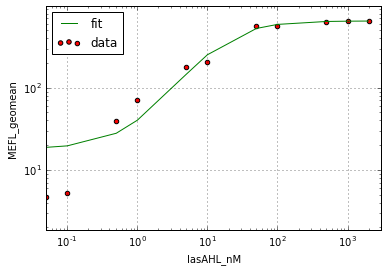

In [37]:
plt.scatter(MyData.lasAHL_nM, MyData.MEFL_geomean, c='r', label='data')
plt.plot(MyData.lasAHL_nM, equation_to_fit(MyData.lasAHL_nM, *fit_params), c='g', label='fit')

plt.xlabel('lasAHL_nM')
plt.ylabel('MEFL_geomean')
plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlim([min(MyData.lasAHL_nM) * 0.5, max(MyData.lasAHL_nM * 1.5)])
plt.ylim([min(MyData.MEFL_geomean) * 0.5, max(MyData.MEFL_geomean) * 1.5])
plt.show()